In [ ]:
pip install matplotlib pandas seaborn 


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
penguins = pd.read_csv('PalmerPenguins.csv')

In [17]:
penguins.head()

studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion  Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0                39.1               18.7                181.0         3750.0   
1                39.5               17.4                186.0         3800.0   
2                40.3               18.0                195.0         3250.0   
3                 NaN                NaN                  NaN            NaN   
4                36.7               19.3                193.0         3450.0   

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0    MALE                NaN                NaN   
1  FEMALE            8.94956          -24.69454   
2  FEMALE            8.36821          -25.33302   
3     NaN                NaN                NaN   
4  FEMALE            8.76651          -25.32426   

                         Comments  
0  Not enough blood for isotopes.  
1                             NaN  
2                             NaN  
3              Adult not sampled.  
4                             NaN

In [18]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [ ]:
# Removing Unwanted Rows And Columns
penguins.drop(columns=['Comments'],inplace=True)
penguins= penguins.dropna()

In [44]:

penguins.info()


<class 'pandas.core.frame.DataFrame'>
Index: 325 entries, 1 to 343
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            325 non-null    object 
 1   Sample Number        325 non-null    int64  
 2   Species              325 non-null    object 
 3   Region               325 non-null    object 
 4   Island               325 non-null    object 
 5   Stage                325 non-null    object 
 6   Individual ID        325 non-null    object 
 7   Clutch Completion    325 non-null    object 
 8   Date Egg             325 non-null    object 
 9   bill_length_mm       325 non-null    float64
 10  bill_depth_mm        325 non-null    float64
 11  Flipper Length (mm)  325 non-null    float64
 12  Body Mass (g)        325 non-null    float64
 13  Sex                  325 non-null    object 
 14  Delta 15 N (o/oo)    325 non-null    float64
 15  Delta 13 C (o/oo)    325 non-null    float64


In [72]:
penguins = penguins.loc[penguins['Sex'] != '.']

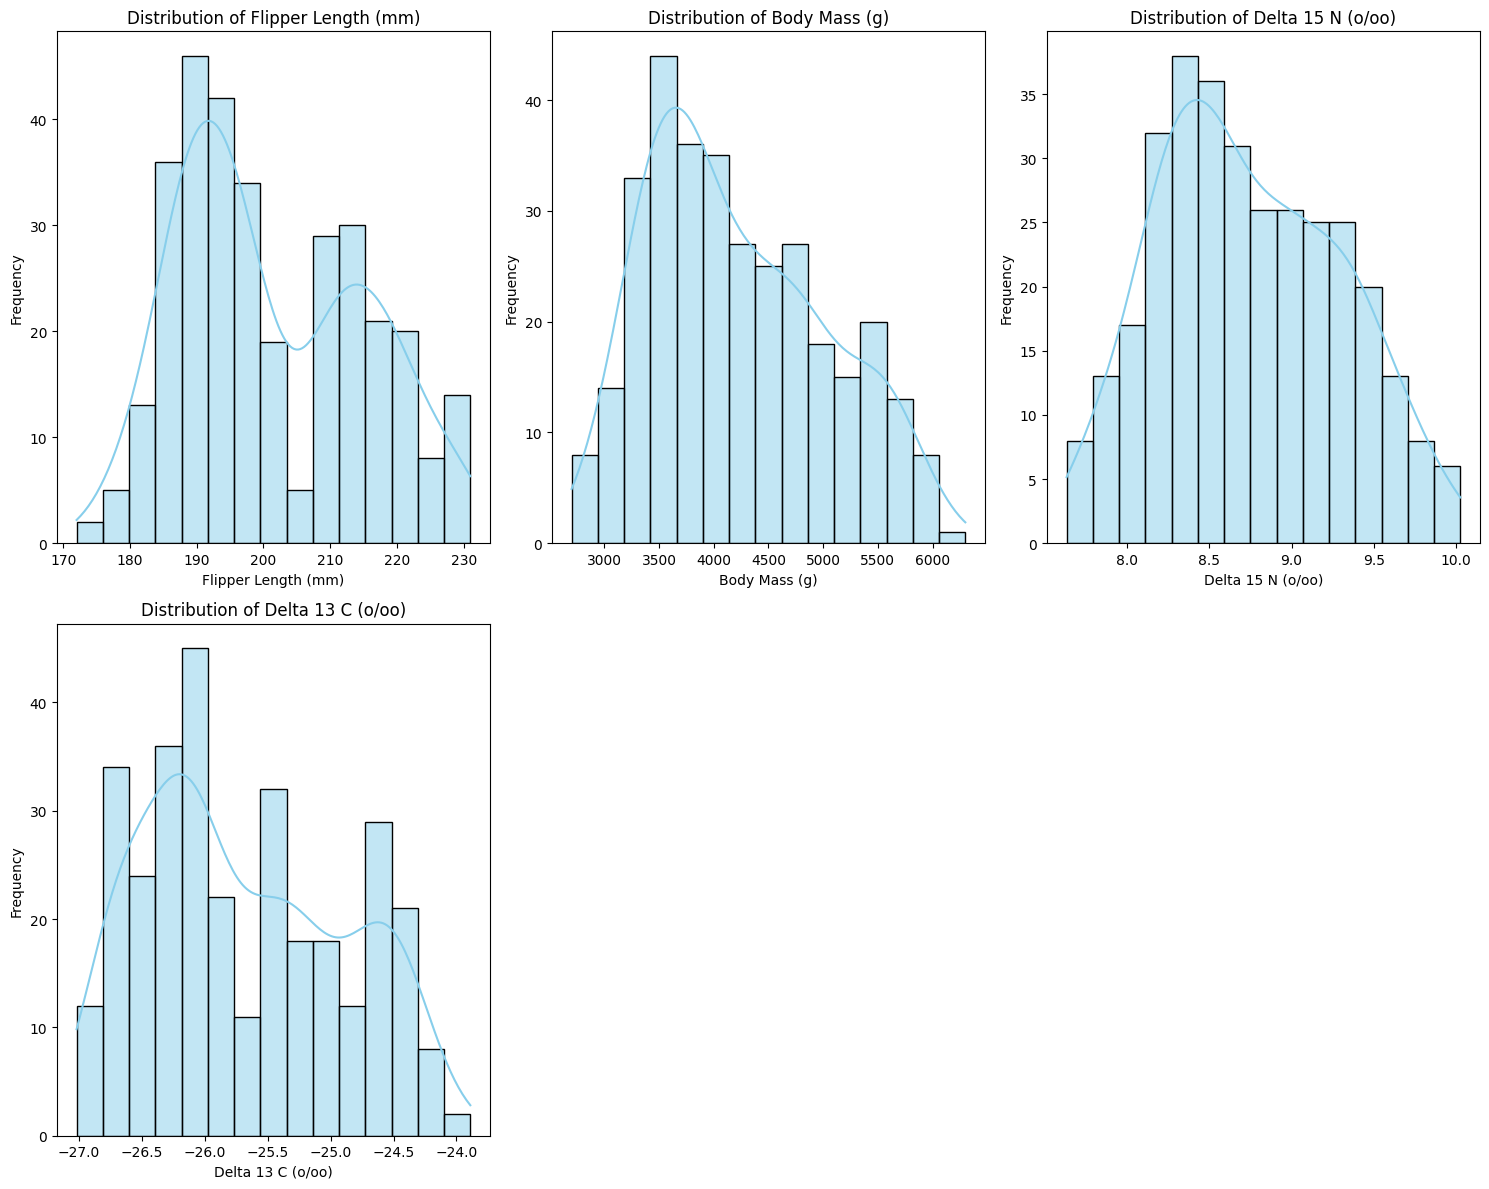

In [88]:
numeric_columns = ['Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
plt.figure(figsize=(15, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(penguins[column], kde=True, color='skyblue', bins=15)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

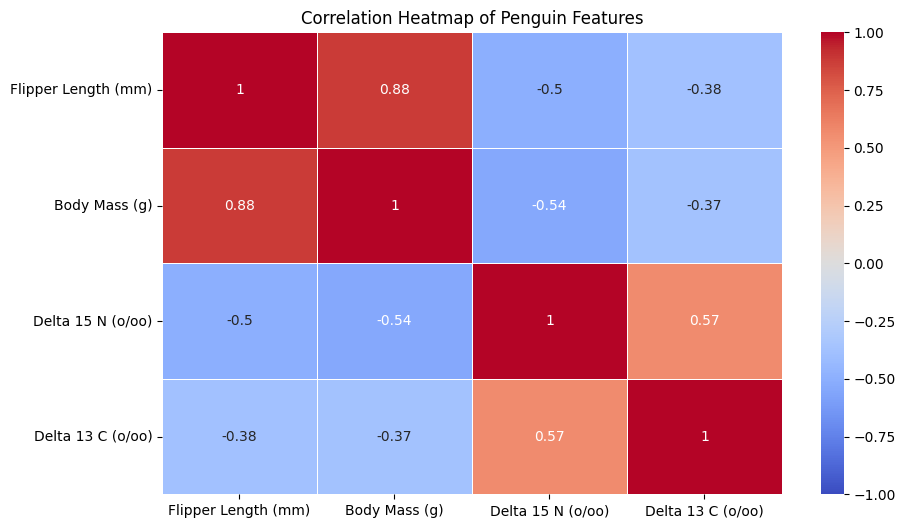

In [89]:
correlation_matrix = penguins[numeric_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Penguin Features')
plt.show()

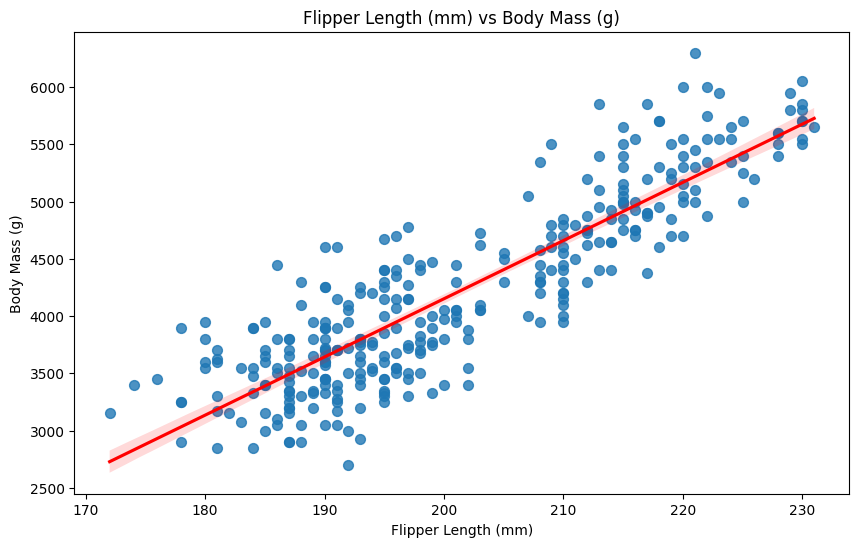

In [47]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Flipper Length (mm)', y='Body Mass (g)', data=penguins, scatter_kws={'s': 50}, line_kws={'color':'red'})
plt.title('Flipper Length (mm) vs Body Mass (g)')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()


C:\Users\AKHIL AHMED\AppData\Local\Temp\ipykernel_44712\3509727488.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y='Body Mass (g)', data=penguins, palette='Set2')


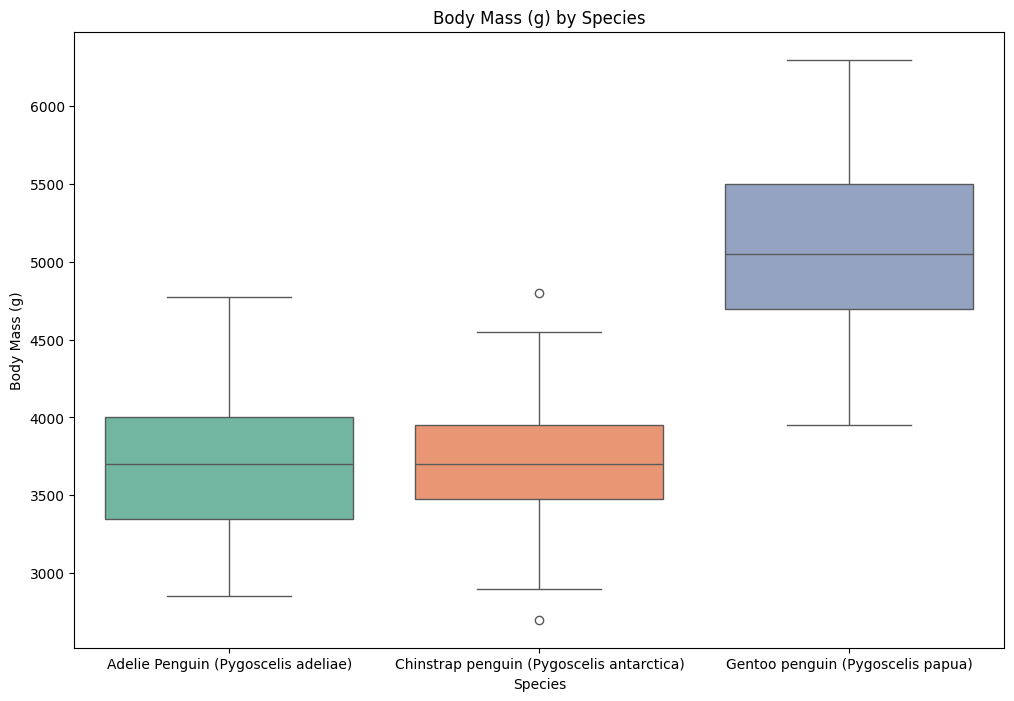

In [53]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Species', y='Body Mass (g)', data=penguins, palette='Set2')
plt.title('Body Mass (g) by Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()


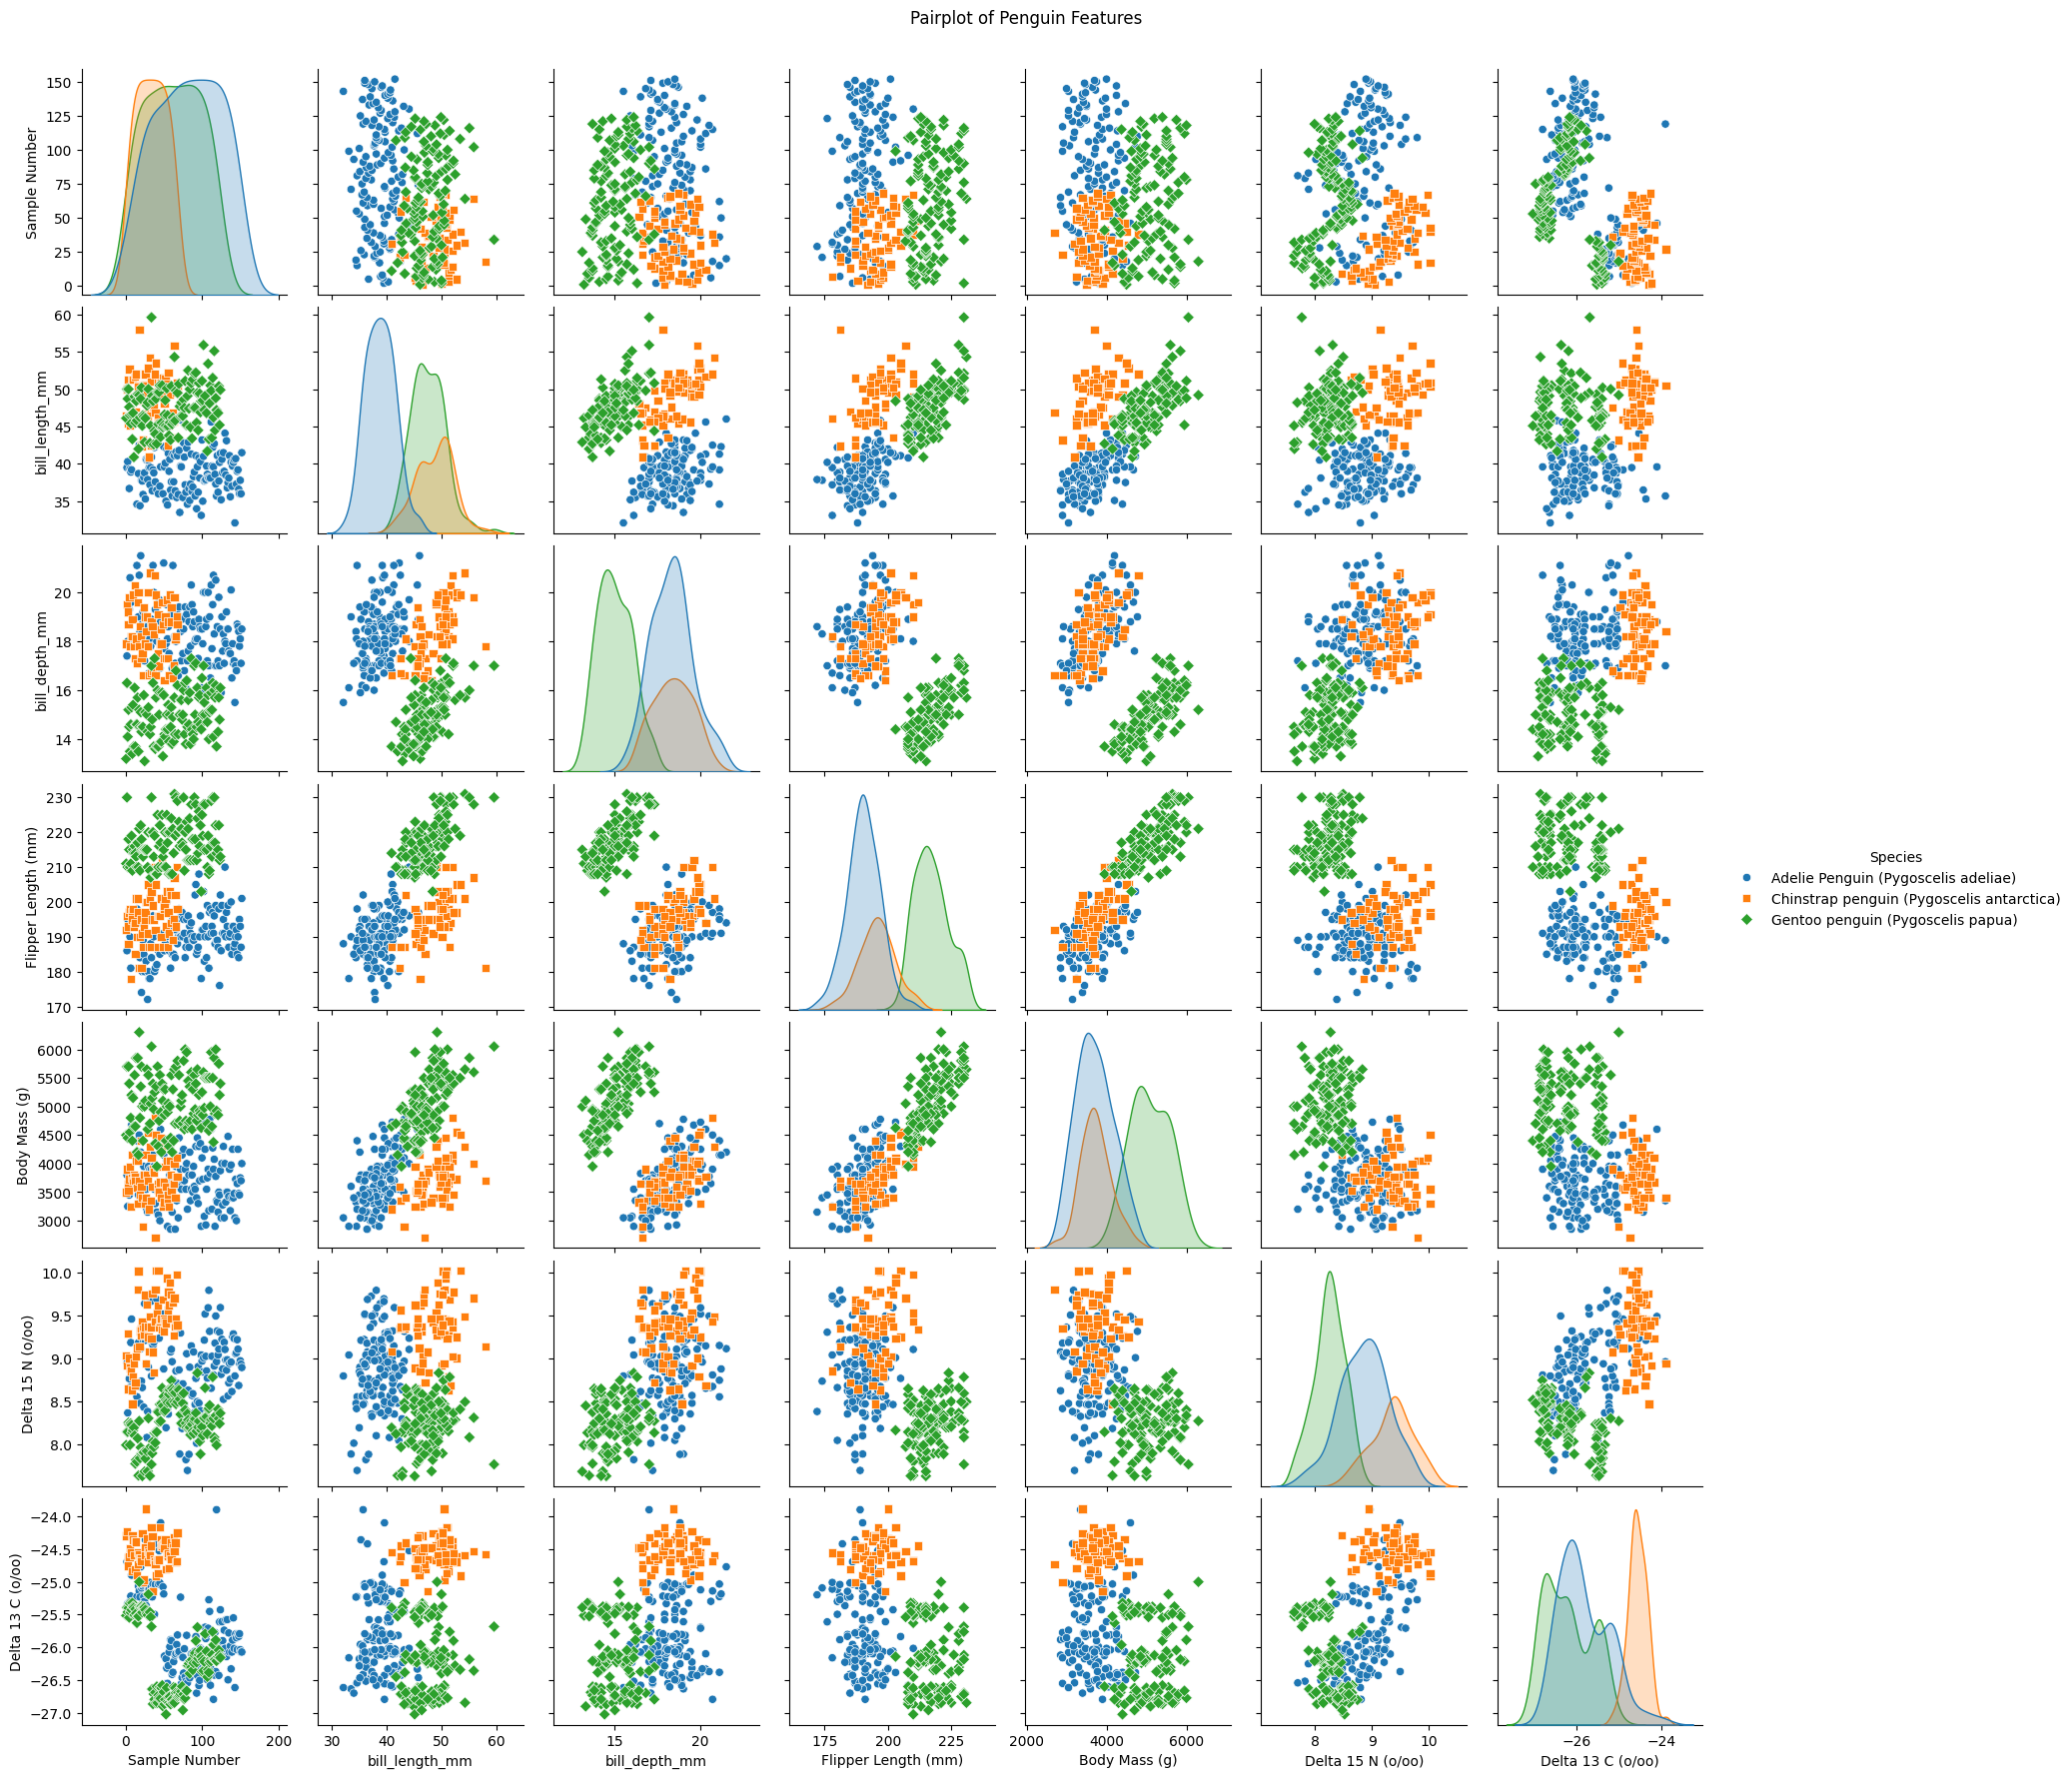

In [54]:
sns.pairplot(penguins, hue='Species', diag_kind='kde', markers=["o", "s", "D"], height=2.5)
plt.suptitle('Pairplot of Penguin Features', y=1.02)
plt.show()

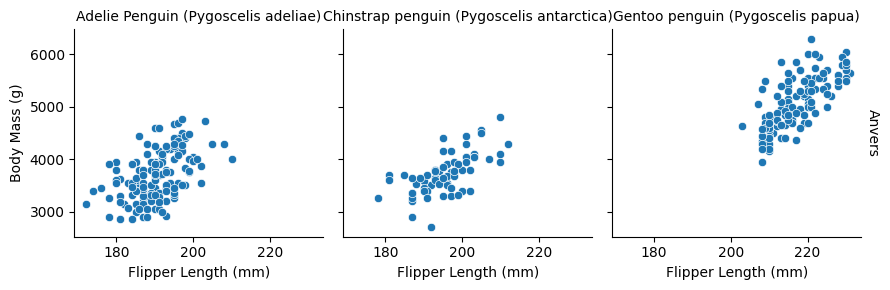

In [61]:

g = sns.FacetGrid(penguins, col='Species', row='Region', margin_titles=True)
g.map(sns.scatterplot, 'Flipper Length (mm)', 'Body Mass (g)')
g.set_axis_labels('Flipper Length (mm)', 'Body Mass (g)')
g.set_titles(row_template='{row_name}', col_template='{col_name}')
plt.show()

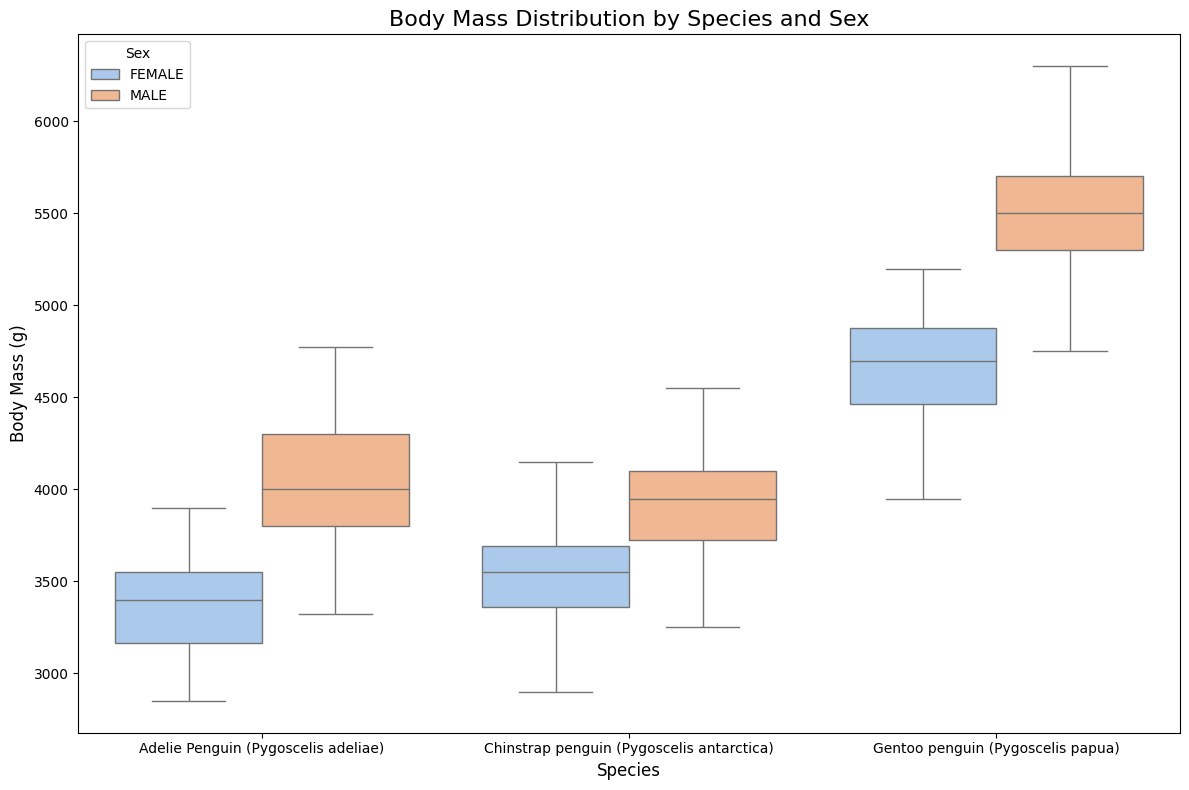

In [79]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Species', y='Body Mass (g)', hue='Sex',data=penguins, palette='pastel', showfliers=False)
plt.title('Body Mass Distribution by Species and Sex', fontsize=16)
plt.ylabel('Body Mass (g)', fontsize=12)
plt.xlabel('Species', fontsize=12)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

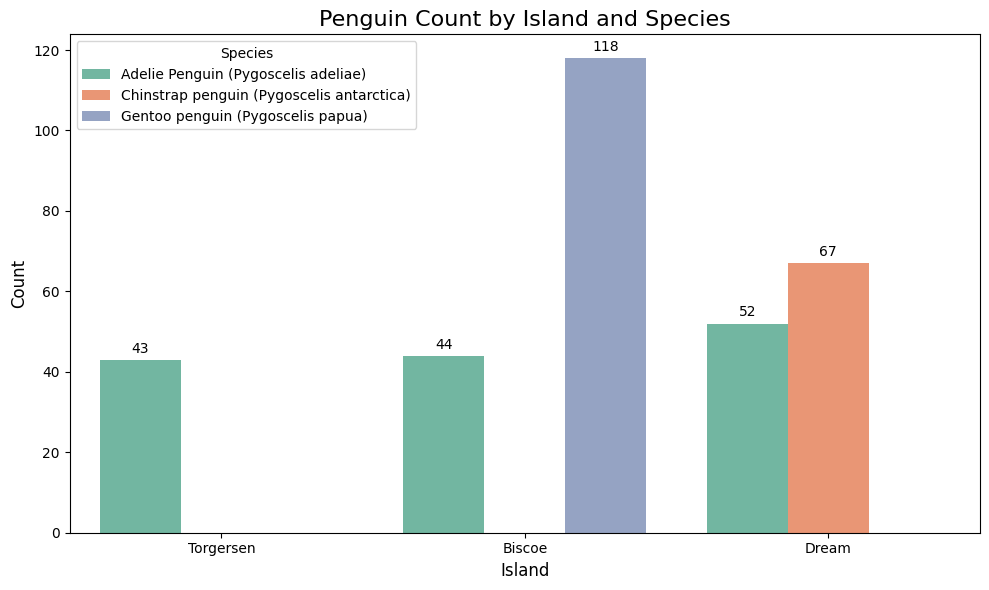

In [80]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='Island', hue='Species', data=penguins, palette='Set2'
)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.title('Penguin Count by Island and Species', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Island', fontsize=12)
plt.legend(title='Species')
plt.tight_layout()
plt.show()
